In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('../data/full_df_cleaned_v3.csv')

In [3]:
df2= pd.read_csv("../data/full_df.csv")

In [4]:
df

Diagnostic           file  \
0                              normal fundus    0_right.jpg   
1                              normal fundus    1_right.jpg   
2     moderate non proliferative retinopathy    2_right.jpg   
3          mild nonproliferative retinopathy    4_right.jpg   
4     moderate non proliferative retinopathy    5_right.jpg   
...                                      ...            ...   
6108       mild nonproliferative retinopathy  4394_left.jpg   
6109       mild nonproliferative retinopathy  4427_left.jpg   
6110       mild nonproliferative retinopathy  4551_left.jpg   
6111  moderate non proliferative retinopathy  4601_left.jpg   
6112       mild nonproliferative retinopathy  4659_left.jpg   

                   target_init  Patient Age Patient Sex  \
0     [1, 0, 0, 0, 0, 0, 0, 0]           69      Female   
1     [1, 0, 0, 0, 0, 0, 0, 0]           57        Male   
2     [0, 1, 0, 0, 0, 0, 0, 0]           42        Male   
3     [0, 1, 0, 0, 0, 0, 0, 0]           53        Male   
4     [0, 1, 0, 0, 0, 0, 0, 0]           50      Female   
...                        ...          ...         ...   
6108  [0, 1, 0, 0, 0, 0, 0, 0]           56        Male   
6109  [0, 1, 0, 0, 0, 0, 0, 0]           43        Male   
6110  [0, 1, 0, 0, 0, 0, 0, 0]           53        Male   
6111  [0, 1, 0, 0, 0, 0, 0, 0]           36        Male   
6112  [0, 1, 0, 0, 0, 0, 0, 0]           42        Male   

                        Target tarstr  N  D  G  C  A  H  M  O  \
0     [1, 0, 0, 0, 0, 0, 0, 0]      N  1  0  0  0  0  0  0  0   
1     [1, 0, 0, 0, 0, 0, 0, 0]      N  1  0  0  0  0  0  0  0   
2     [0, 1, 0, 0, 0, 0, 0, 0]      D  0  1  0  0  0  0  0  0   
3     [0, 1, 0, 0, 0, 0, 0, 0]      D  0  1  0  0  0  0  0  0   
4     [0, 1, 0, 0, 0, 0, 0, 0]      D  0  1  0  0  0  0  0  0   
...                        ...    ... .. .. .. .. .. .. .. ..   
6108  [0, 1, 0, 0, 0, 0, 0, 0]      D  0  1  0  0  0  0  0  0   
6109  [0, 1, 0, 0, 0, 0, 0, 0]      D  0  1  0  0  0  0  0  0   
6110  [0, 1, 0, 0, 0, 0, 0, 0]      D  0  1  0  0  0  0  0  0   
6111  [0, 1, 0, 0, 0, 0, 0, 0]      D  0  1  0  0  0  0  0  0   
6112  [0, 1, 0, 0, 0, 0, 0, 0]      D  0  1  0  0  0  0  0  0   

                     filename  
0     0_right_69_Female_N.jpg  
1       1_right_57_Male_N.jpg  
2       2_right_42_Male_D.jpg  
3       4_right_53_Male_D.jpg  
4     5_right_50_Female_D.jpg  
...                       ...  
6108  4394_left_56_Male_D.jpg  
6109  4427_left_43_Male_D.jpg  
6110  4551_left_53_Male_D.jpg  
6111  4601_left_36_Male_D.jpg  
6112  4659_left_42_Male_D.jpg  

[6113 rows x 16 columns]

Text(0.5, 1.0, 'Old DataFrame')

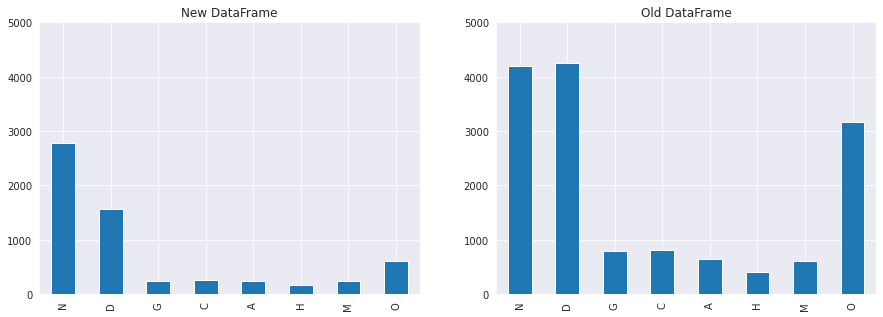

In [75]:
list_names =['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']
maladies = ['Normal', 'Diabetes', 'Glaucoma', 'Cataract', 'Age related Macular Degeneration', 'Hypertension', 'Pathological Myopia', 'Other']

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
df[list_names].sum().plot(kind = 'bar')
plt.ylim((0,5000))
plt.title('New DataFrame')

plt.subplot(1,2,2)
tmp = df2[list_names].sum()*2
tmp.plot(kind = 'bar')
plt.ylim((0,5000))
plt.title('Old DataFrame')

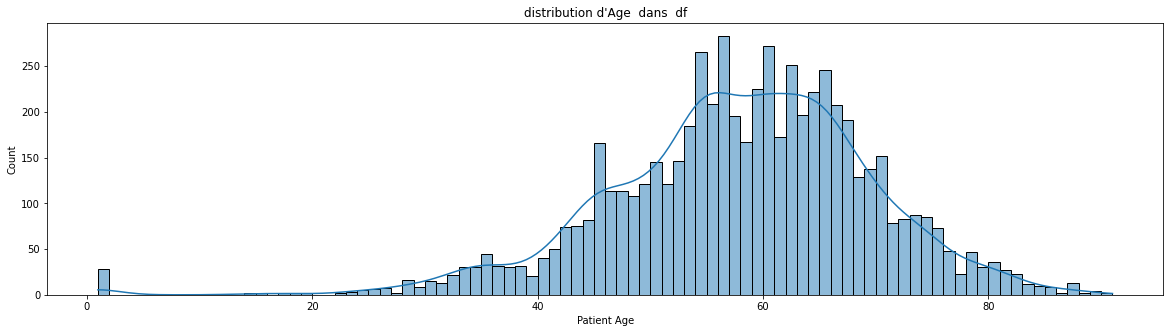

In [6]:
fig, (ax1) = plt.subplots(1, 1, figsize=(20,5))
sns.histplot(ax=ax1, x="Patient Age", data=df, kde=True, bins=90)
ax1.set_title("distribution d'Age  dans  df")
plt.show()

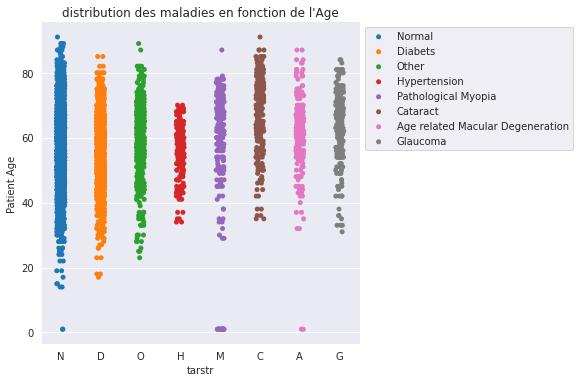

In [62]:
sns.catplot(x='tarstr', y='Patient Age', data=df)
plt.title("distribution des maladies en fonction de l'Age")
plt.legend(bbox_to_anchor=(1,1), labels=['Normal', 'Diabets', 'Other', 'Hypertension', 'Pathological Myopia', 'Cataract', 'Age related Macular Degeneration', 'Glaucoma'])
    
plt.show()

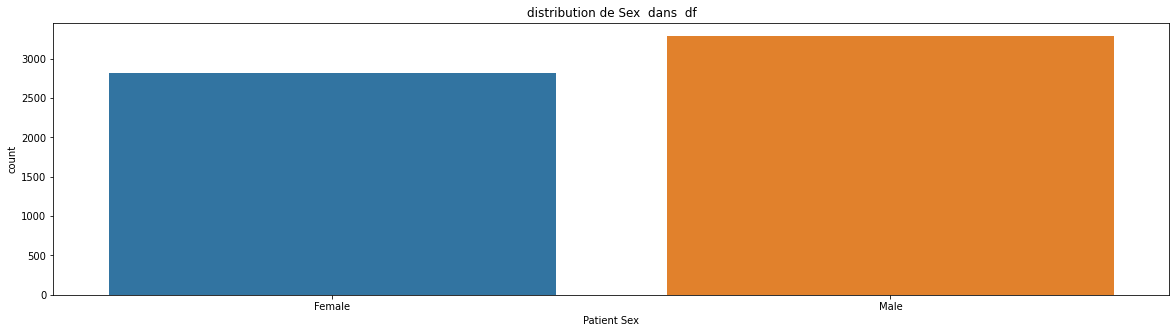

In [7]:
fig, (ax1) = plt.subplots(1, 1, figsize=(20,5))
sns.countplot(ax=ax1, x="Patient Sex", data=df)
ax1.set_title("distribution de Sex  dans  df")
plt.show()

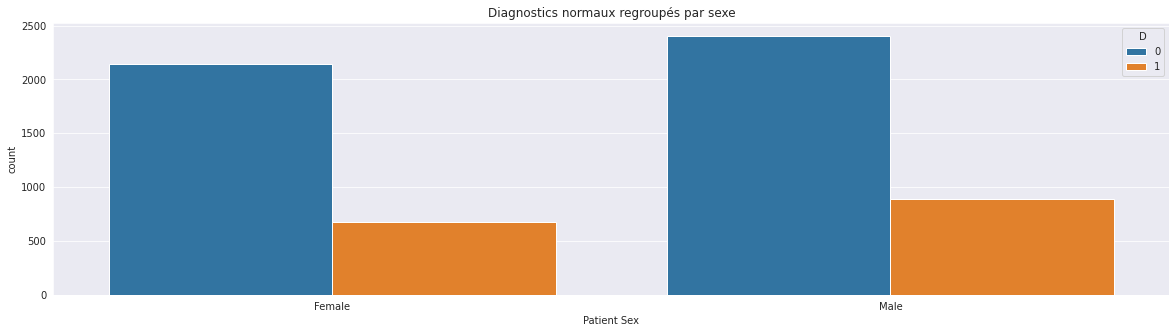

In [8]:
sns.set_style("darkgrid")
fig= plt.subplots(figsize=(20,5))
sns.countplot(x='Patient Sex', hue="D", data=df)
plt.title("Diagnostics normaux regroupés par sexe")
plt.show()

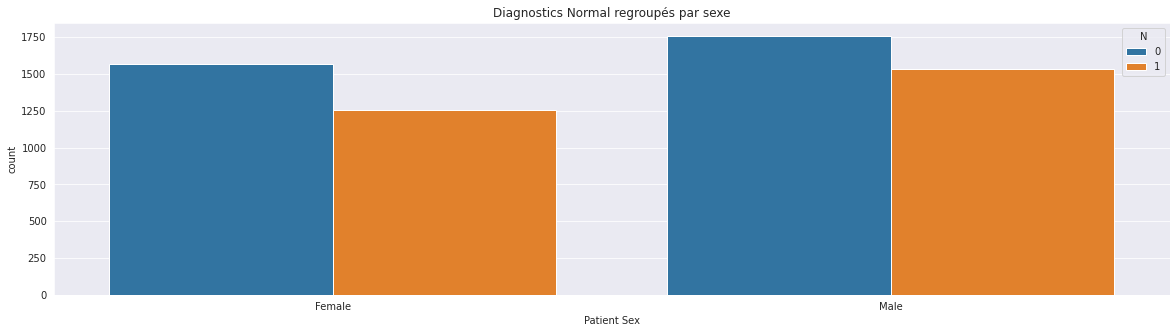

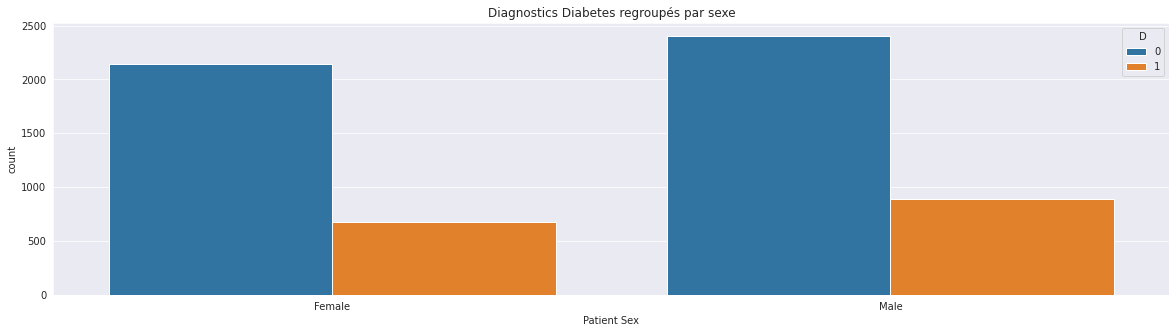

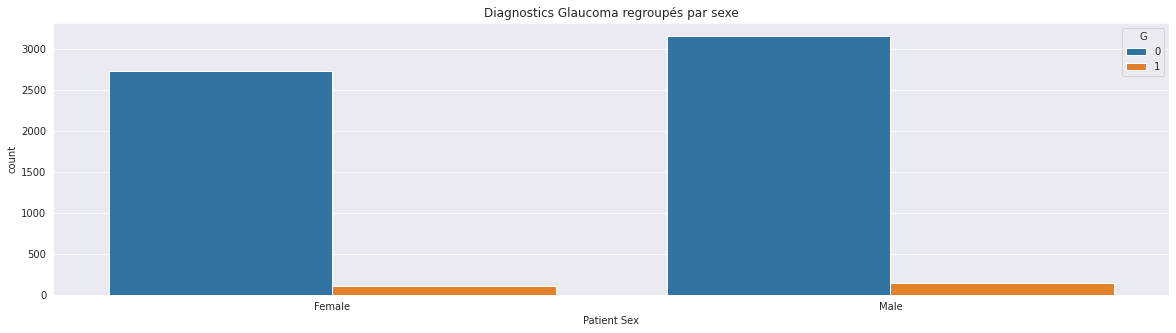

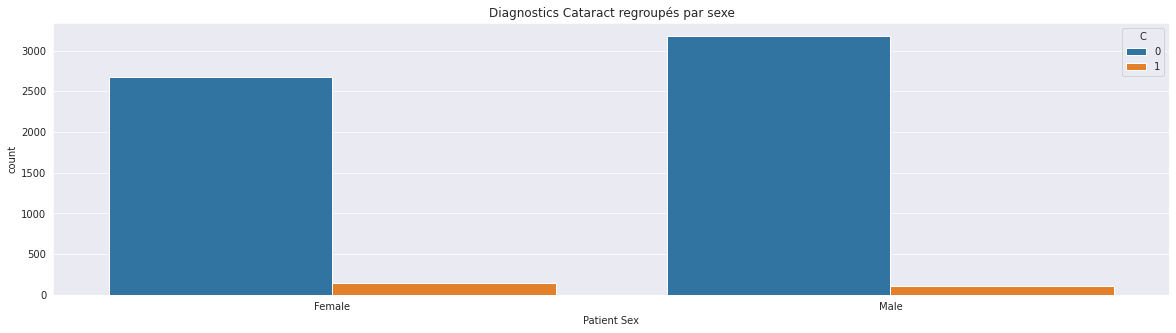

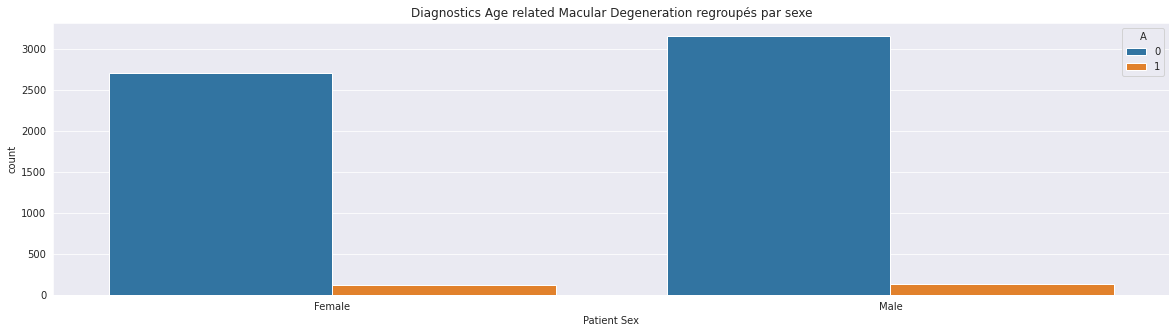

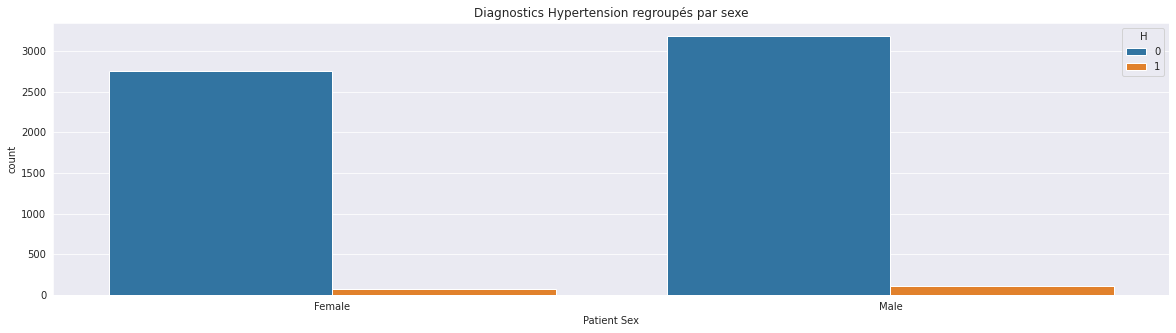

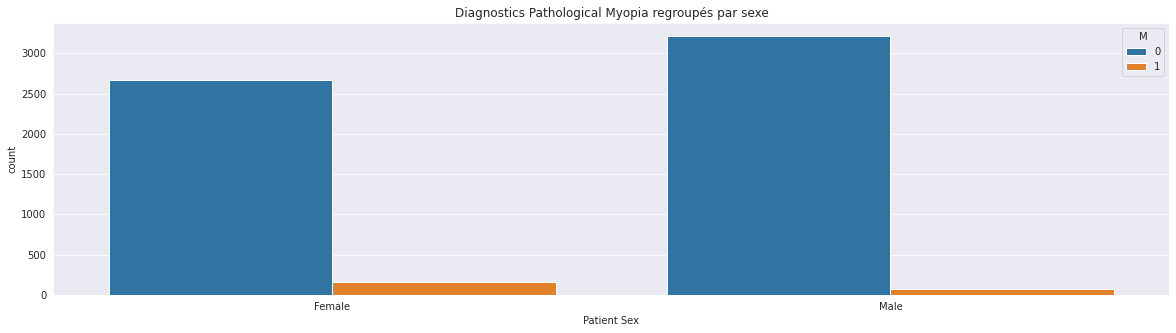

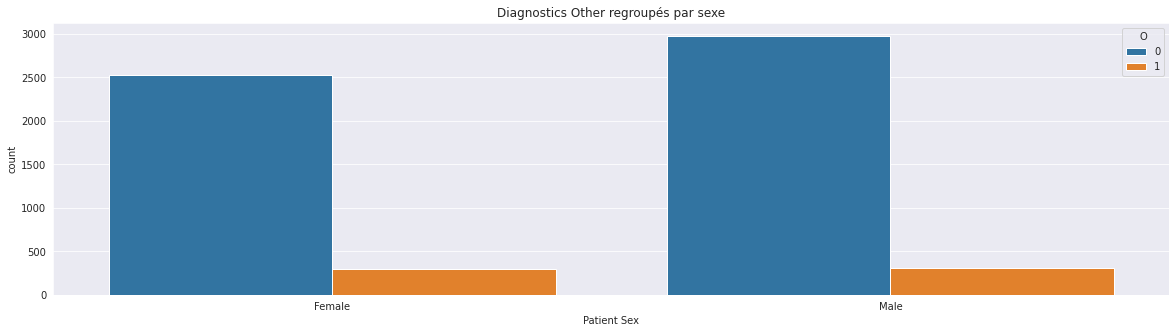

In [9]:
for i in range(len(list_names)):
    sns.set_style("darkgrid")
    fig= plt.subplots(figsize=(20,5))
    sns.countplot(x='Patient Sex', hue=list_names[i], data=df)
    plt.title(f"Diagnostics {maladies[i]} regroupés par sexe")
    plt.show()

In [10]:
df_femme = df.loc[(df['Patient Sex']=='Female')].reset_index()

In [11]:
df_homme = df.loc[(df['Patient Sex']=='Male')].reset_index()

In [70]:
def plot_count(feature, title, df, size=1, show_all=False):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if show_all:
        g = sns.countplot(df[feature], palette='Set3')
        g.set_title("{} distribution".format(title))
    else:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
        if(size > 2):
            plt.xticks(rotation=0, size=10)
            for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,
                        height + 0.2,
                        '{:1.2f}%'.format(100*height/total),
                        ha="center") 
        g.set_title("Nombre et pourcentage de {}".format(title))
    plt.show()   

/home/tom/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


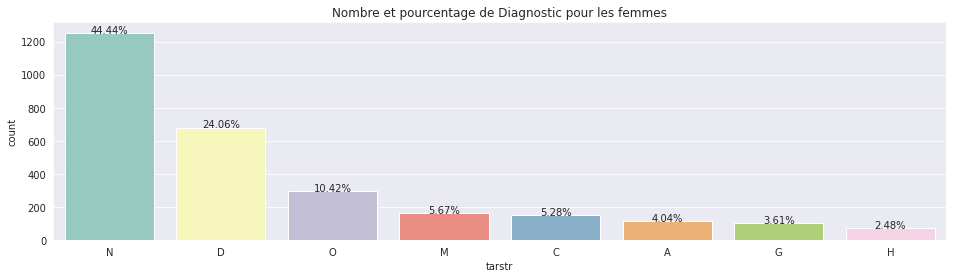

In [71]:
plot_count("tarstr", "Diagnostic pour les femmes", df_femme, size=4)
plt.show()

/home/tom/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


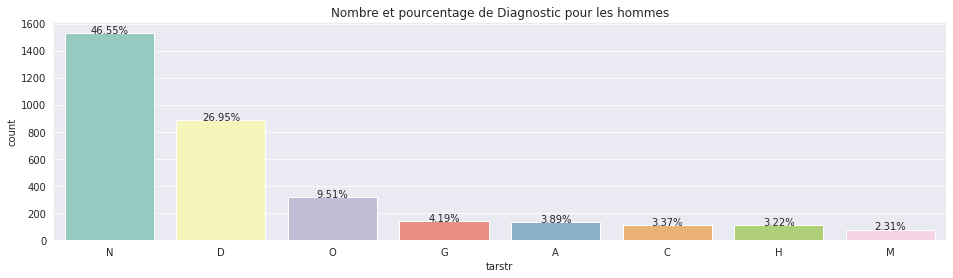

In [15]:
plot_count("tarstr", "Diagnostic pour les hommes", df_homme, size=4)

/home/tom/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


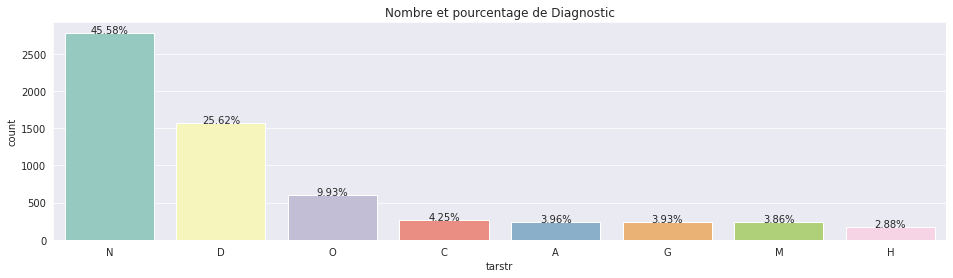

In [16]:
plot_count("tarstr", "Diagnostic", df, size=4)

In [17]:
counts = df['tarstr'].value_counts().head(8)
counts

N    2786
D    1566
O     607
C     260
A     242
G     240
M     236
H     176
Name: tarstr, dtype: int64

In [18]:
labels = ['Normal', 'Diabets', 'Other', 'Cataract', 'Age related Macular Degeneration', 'Glaucoma', 'Pathological Myopia', 'Diabetes, Hypertension']

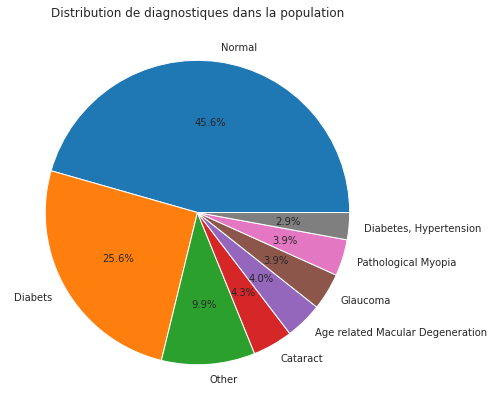

In [76]:
fig = plt.figure(figsize =(10, 7)) 
plt.pie(counts, labels = labels, autopct='%1.1f%%')
plt.title('Distribution de diagnostiques dans la population')
plt.show()

In [21]:
df_n = df.loc[(df.N==1)].sample(9).reset_index()
df_d = df.loc[(df.D==1)].sample(9).reset_index()
df_g = df.loc[(df.G==1)].sample(9).reset_index()
df_c = df.loc[(df.C==1)].sample(9).reset_index()
df_a = df.loc[(df.A==1)].sample(9).reset_index()
df_h = df.loc[(df.H==1)].sample(9).reset_index()
df_m = df.loc[(df.M==1)].sample(9).reset_index()
df_o = df.loc[(df.O==1)].sample(9).reset_index()

df_exemples = [df_n, df_d, df_g, df_c, df_a, df_h, df_m, df_o]

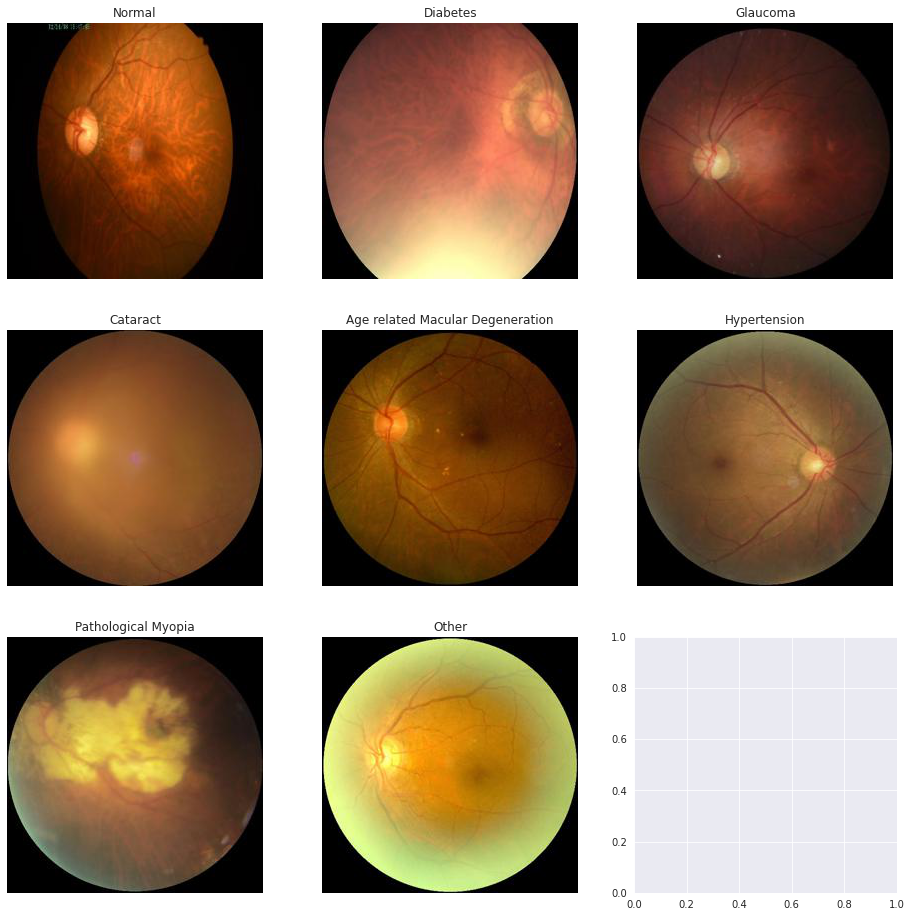

In [22]:
import os
import imageio

IMAGE_PATH = '../data/preprocessed_images2/'
eye_exam="filename"
f, ax = plt.subplots(3,3, figsize=(16,16))

for i, j, k in zip(range(len(df_exemples)), df_exemples, maladies):
    dd = j.iloc[0]
    image_name = dd[eye_exam]
    image_path = os.path.join(IMAGE_PATH, image_name)
    img_data=imageio.imread(image_path)
    ax[i//3, i%3].imshow(img_data)
    ax[i//3, i%3].axis('off')
    ax[i//3, i%3].set_title(k)

In [23]:
IMAGE_PATH = "/home/tom/code/ODR/ocular-disease-recognition/raw_data/preprocessed_images"
def show_images(df, title="Diagnosys", eye_exam="file"):
    print(f"Exemples of eyes diagnostic with {title}")
    f, ax = plt.subplots(3,3, figsize=(16,16))
    for i,idx in enumerate(df.index):
        dd = df.iloc[idx]
        image_name = dd[eye_exam]
        image_path = os.path.join(IMAGE_PATH, image_name)
        img_data=imageio.imread(image_path)
        ax[i//3, i%3].imshow(img_data)
        ax[i//3, i%3].axis('off')
    plt.show()

Exemples of eyes diagnostic with Normal


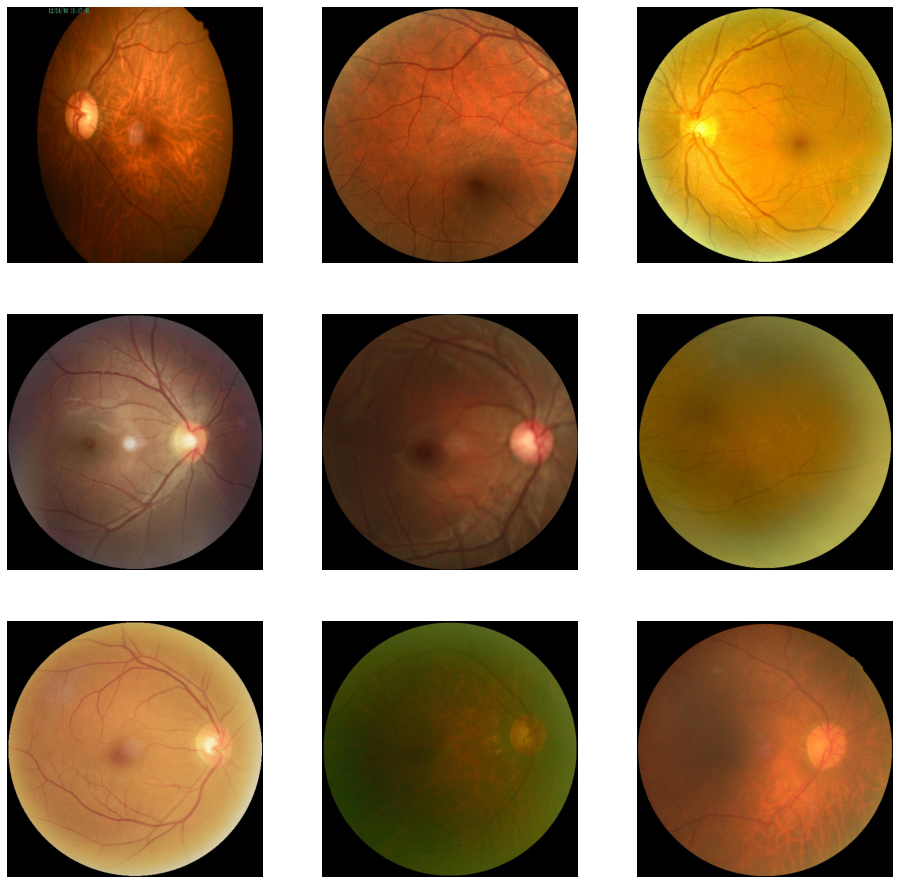

Exemples of eyes diagnostic with Diabetes


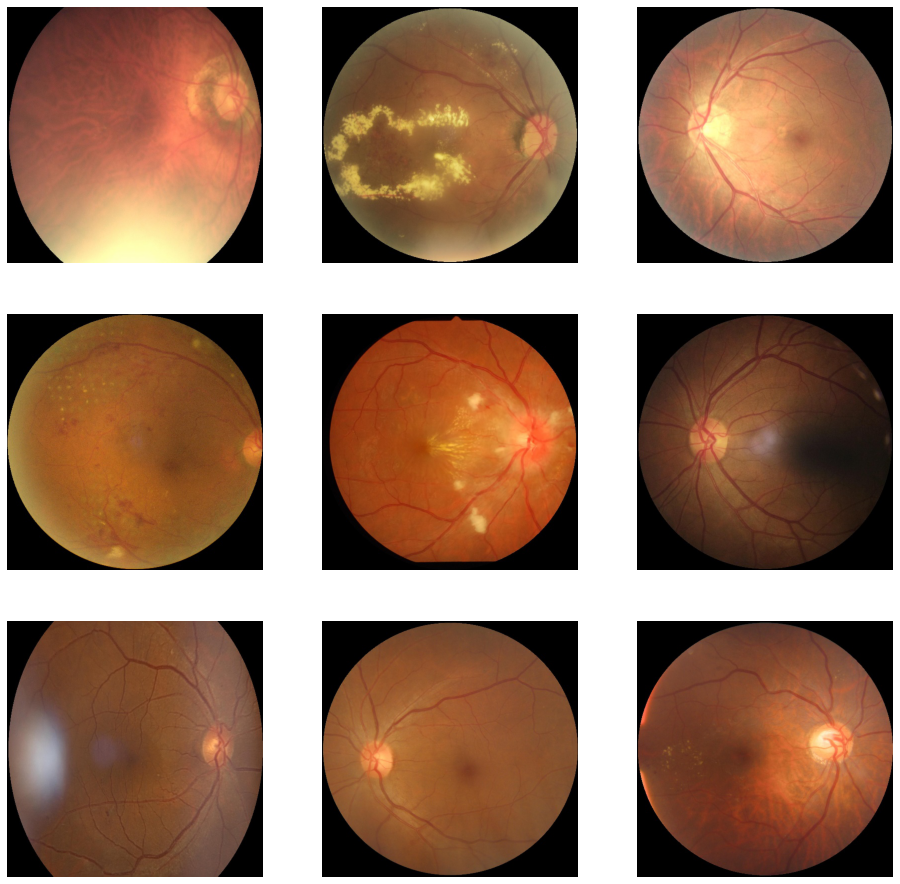

Exemples of eyes diagnostic with Glaucoma


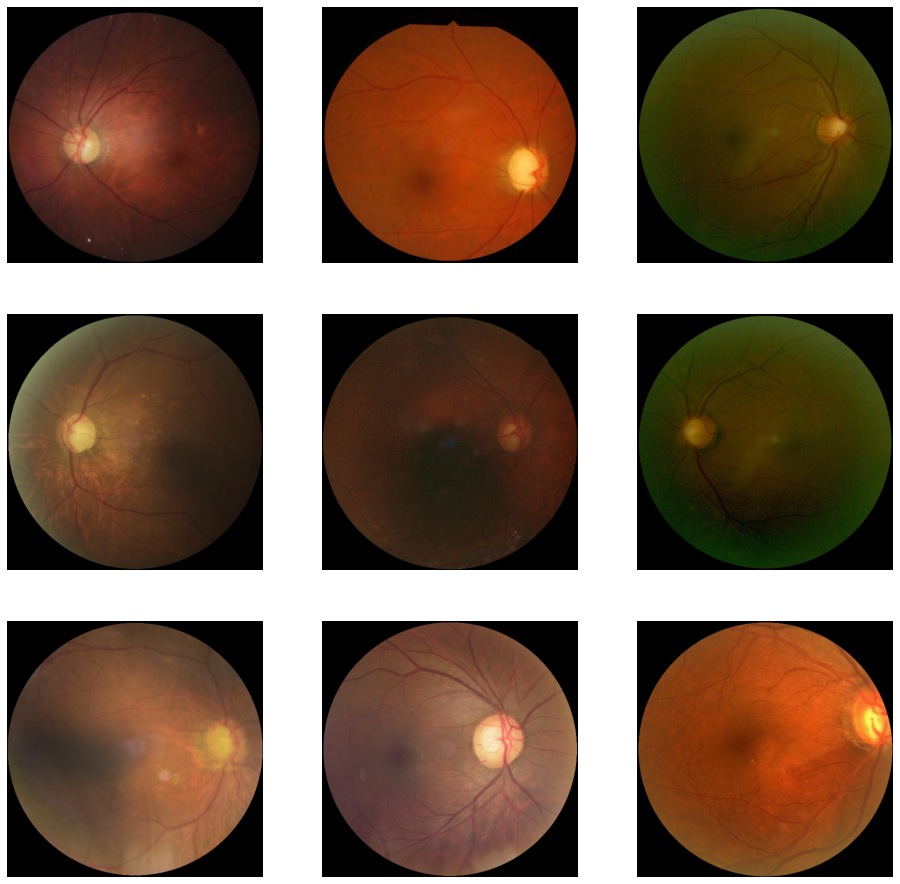

Exemples of eyes diagnostic with Cataract


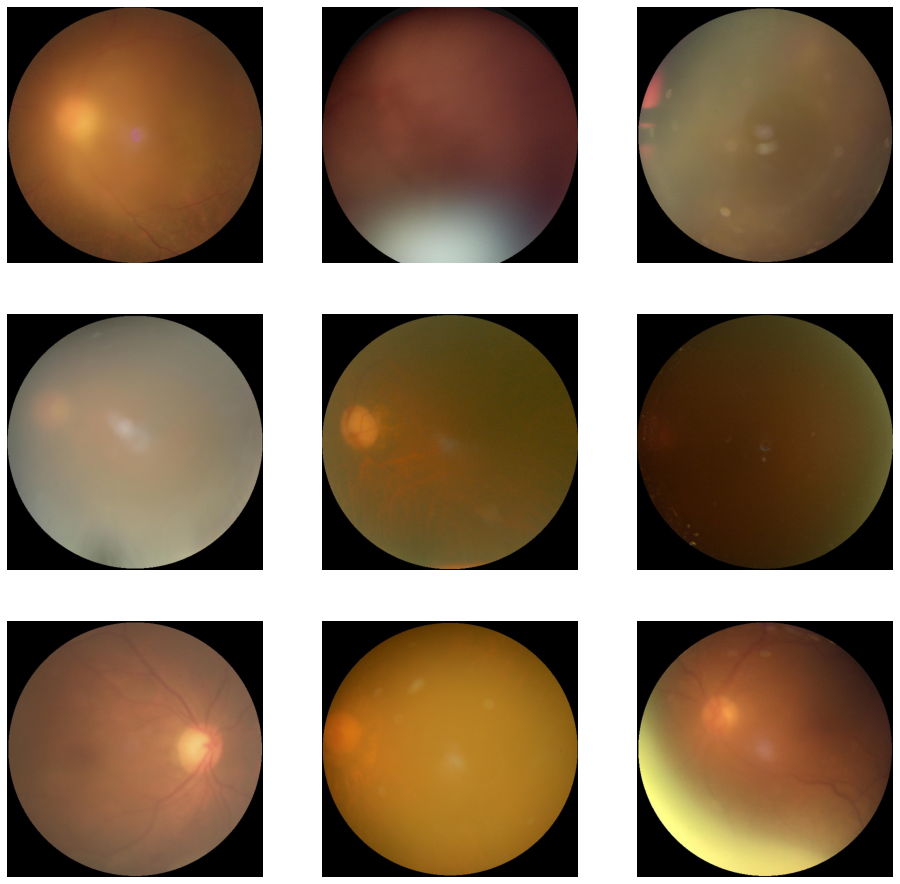

Exemples of eyes diagnostic with Age related Macular Degeneration


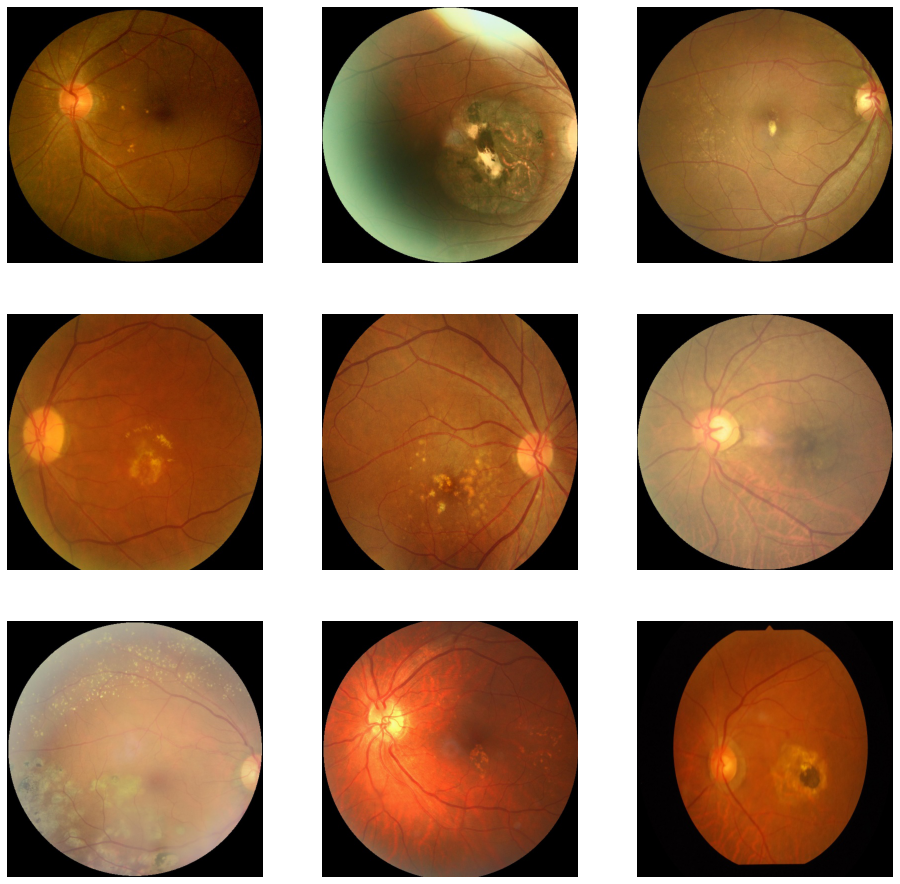

Exemples of eyes diagnostic with Hypertension


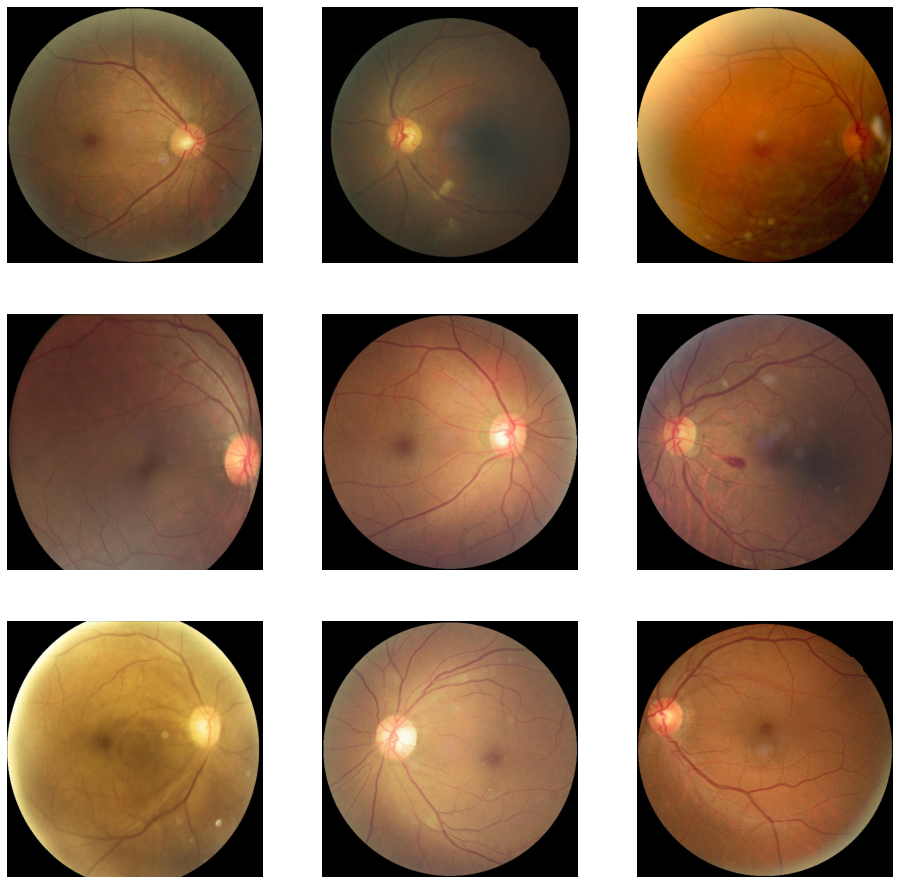

Exemples of eyes diagnostic with Pathological Myopia


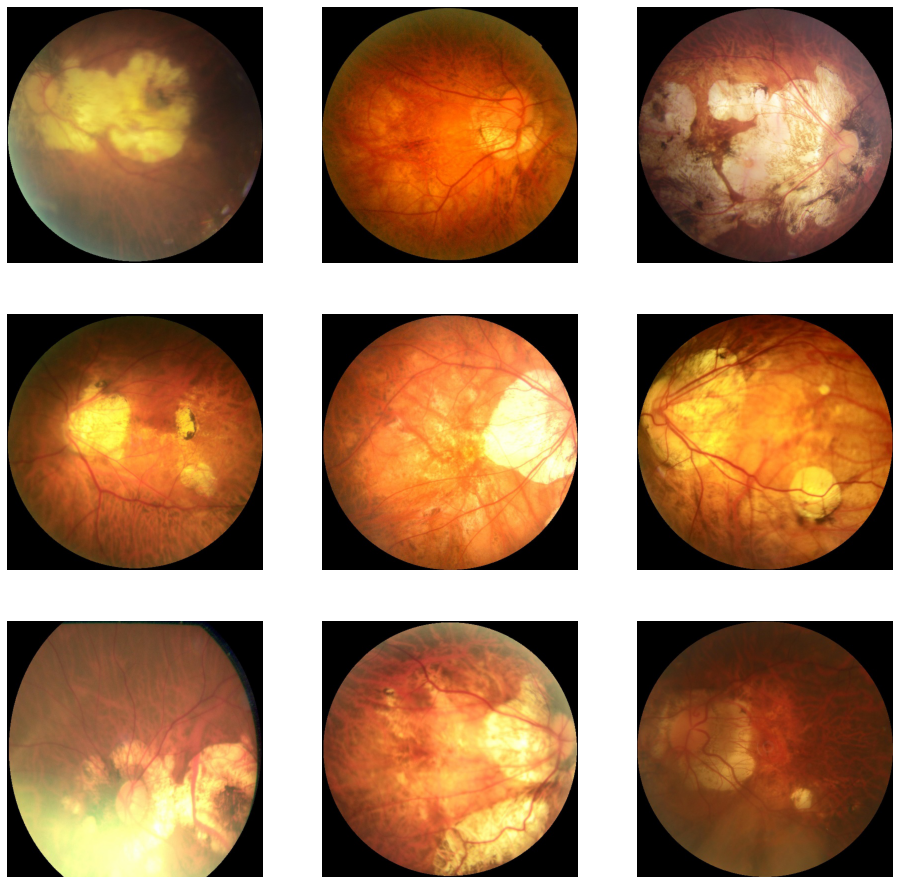

Exemples of eyes diagnostic with Other


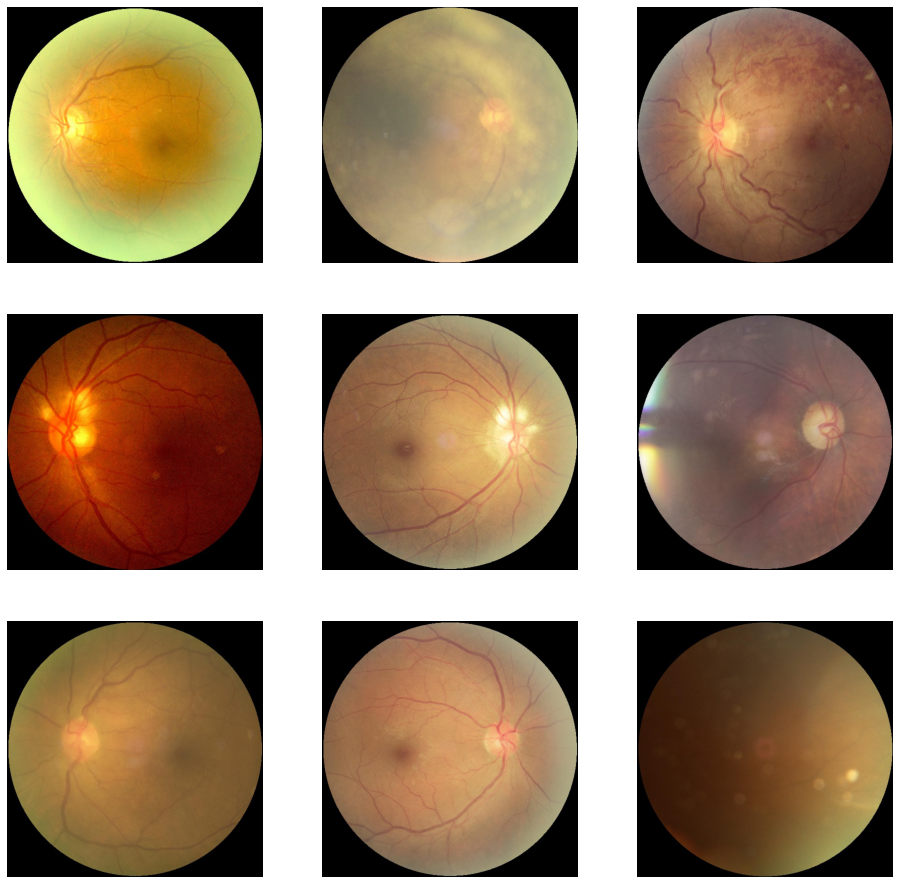

In [24]:
for i, j in zip(df_exemples, maladies):
    show_images(i, title=j, eye_exam="file")